In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'suck'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`.

In [ ]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned

Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty.
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:
# Your code and description goes here

import random

def init_environment(size, p):
    env = []  #intializing environment
    for itr in range(size):
        row_in = []
        for jtr in range(size):
            if random.random() < p:
                row_in.append('dirty')
            else:
                row_in.append('clean')
        env.append(row_in)
    return env


def environment(A,size, p,verbose = False):
  env = init_environment(size, p)
  agt_pos = (random.randint(0, size-1), random.randint(0, size-1))
  if verbose: print("starting Position of agent :", agt_pos)

  total_actions = 0
  if A == 'simple_agent':
    while any('dirty' in row for row in env):
      dirty = env[agt_pos[0]][agt_pos[1]] == 'dirty'
      bumper = {"north": agt_pos[0] == 0,"south": agt_pos[0] == size - 1,
                    "west": agt_pos[1] == 0,"east": agt_pos[1] == size - 1}

      action,agt_pos = simple_reflex_agent(bumper,dirty,agt_pos)
      if verbose:print("Agent's Position after Action:", agt_pos)
      if verbose:print("Action:", action)
      if verbose:print(env)
      total_actions += 1
      if action == 'suck':
        env[agt_pos[0]][agt_pos[1]] = 'clean'

        print("Total Step taken to clean", total_actions)
        print()

    return total_actions


  if A == 'model_based_agent':
    if verbose:print("Initial agent position:", agt_pos)
    agt_pos = corner_move(agt_pos, size)
    if agt_pos == (0,0):

      while any('dirty' in row for row in env):
            dirty = env[agt_pos[0]][agt_pos[1]] == 'dirty'
            bumper = {
                "north": agt_pos[0] == 0,"south": agt_pos[0] == size - 1,
                "west": agt_pos[1] == 0, "east": agt_pos[1] == size - 1
            }

            action, agt_pos = model_based_agent(bumper, dirty, agt_pos, size)  # Update action
            if verbose:print("Agent Position after Action:", agt_pos)
            # print("Action:", action)

            if verbose:print(env)
            total_actions += 1
            if action == 'suck':
                env[agt_pos[0]][agt_pos[1]] = 'clean'  # Update the environment


            print("Total Step taken to clean", total_actions)
            print()

      return total_actions


environment('simple_agent',5,0.2)
#environment('model_based_agent',5,0.2)



Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [ ]:
def simple_reflex_agent(bumper,dirty,agt_pos):
  directions = ['up', 'down', 'left', 'right']
  if dirty:
      return 'suck', agt_pos
  else:
    while True:
        action =  random.choice(directions)

        if action == 'up' and not bumper["north"]:
              agt_pos = (agt_pos[0] - 1, agt_pos[1])
              break
        elif action == 'down' and not bumper["south"]:
              agt_pos = (agt_pos[0] + 1, agt_pos[1])
              break
        elif action == 'left' and not bumper["west"]:
              agt_pos = (agt_pos[0], agt_pos[1] - 1)
              break
        elif action == 'right' and not bumper["east"]:
              agt_pos = (agt_pos[0], agt_pos[1] + 1)
              break

  return action,agt_pos


## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [ ]:
# Function to move to the top-left corner (0, 0)
def corner_move(agt_pos, size):
    # Explore until the top-left corner is reached
    while True:
        # Print current agent's position
        print("Current agent position:", agt_pos)

        # Check if agent is in the top-left corner
        if agt_pos == (0, 0):
            print("Agent is at the left corner (0, 0)")
            break  # Found the corner, exit loop
        else:
            # Move agent to the top-left corner
            if agt_pos[0] > 0:
                agt_pos = (agt_pos[0] - 1, agt_pos[1])  # Move up
            elif agt_pos[1] > 0:
                agt_pos = (agt_pos[0], agt_pos[1] - 1)  # Move left

    return agt_pos


def model_based_agent(bumper, dirty, agt_pos, size):
    if dirty:
        print("Action: suck")
        return 'suck', agt_pos
    else:
        if agt_pos[0] == 0 and agt_pos[1] == 0:  #topleft corner
            if not bumper['east']:
                print("Action: right")
                return 'right', (agt_pos[0], agt_pos[1] + 1)  #right move
            else:
                print("Action: down")
                return 'down', (agt_pos[0]+1, agt_pos[1])  # down move
        elif agt_pos[0] == 0 and agt_pos[1] == size - 1:
            print("Action: down")
            return 'down', (agt_pos[0]+1, agt_pos[1])
        elif agt_pos[0] % 2 == 0:  # Even row
            if bumper['east']:  # East on
                if agt_pos[0] < size - 1:
                    print("Action: down")
                    return 'down', (agt_pos[0] + 1, agt_pos[1])  #  down move
                else:
                    print("Action: left")
                    return 'left', (agt_pos[0], agt_pos[1] - 1)   #  left move
            else:
                if agt_pos[1] < size - 1:
                    print("Action: right")
                    return 'right', (agt_pos[0], agt_pos[1] + 1)  #  right move
                else:
                    print("Action: down")
                    return 'down', (agt_pos[0] + 1, agt_pos[1])  #  down move
        else:  #if the row is odd
            if bumper['west']:
                if agt_pos[0] < size - 1:
                    print("Action: down")
                    return 'down', (agt_pos[0] + 1, agt_pos[1])
                else:
                    print("Action: right")
                    return 'right', (agt_pos[0], agt_pos[1] + 1)   #  right move
            else:
                if agt_pos[1] > 0:
                    print("Action: left")
                    return 'left', (agt_pos[0], agt_pos[1] - 1)   #  left move
                else:
                    print("Action: down")
                    return 'down', (agt_pos[0] + 1, agt_pos[1])  #  down move




## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [ ]:
import numpy as np
import pandas as pd
import random

# Define the functions for the agents and environment
# Assuming you have defined the functions earlier in your code

# Function to simulate the environment and return the number of steps
def simulate_environment(agent_func, size):
    agt_pos = (random.randint(0, size - 1), random.randint(0, size - 1))  # initializing random starting position
    total_actions = 0  # Initialize total actions


    if agent_func == 'simple_randomized_agent':
            action = simple_environment(simple_randomized_agent, max_steps = 10*(size*size))
            return action
    elif agent_func == 'simple_reflex_agent':
            action = environment('simple_agent',size,0.2)
            return action
    else:
            action = environment('model_based_agent', size, 0.2)
            return action

# Number of random runs
N = 100


# Room sizes
room_sizes = [5,10,100]

df = pd.DataFrame(columns=['size','random','simple','model'])

# Perform simulations for each room size
for size in room_sizes:
    # Lists to store performance measure for each random run
    randomized_steps = []
    simple_reflex_steps = []
    model_based_steps = []


    total_action_random = 0
    total_action_simple = 0
    total_action_model = 0



    # Simulate environment and store steps for each agent
    for _ in range(N):
        steps_randomized = simulate_environment('simple_randomized_agent', size)
        steps_reflex = simulate_environment('simple_reflex_agent', size)
        steps_model_based = simulate_environment('model_based_agent', size)

        total_action_random += steps_randomized
        total_action_simple += steps_reflex
        total_action_model += steps_model_based


    # randomized_steps.append(total_action_random)
    # simple_reflex_steps.append(total_action_simple)
    # model_based_steps.append(total_action_model)



    # Create a dictionary to store the data for this iteration
    data = {
        'size': size,
        'random': total_action_random,
        'simple': total_action_simple,
        'model': total_action_model
    }

    # Append this dictionary to the DataFrame
    df = df.append(data, ignore_index=True)



# # Display the DataFrame
print(df)


In [ ]:
df

,size,random,simple,model
0,5x5,6068,10539,2394
1,10x10,20013,92234,11443
2,100x100,100000,44159742,1302831


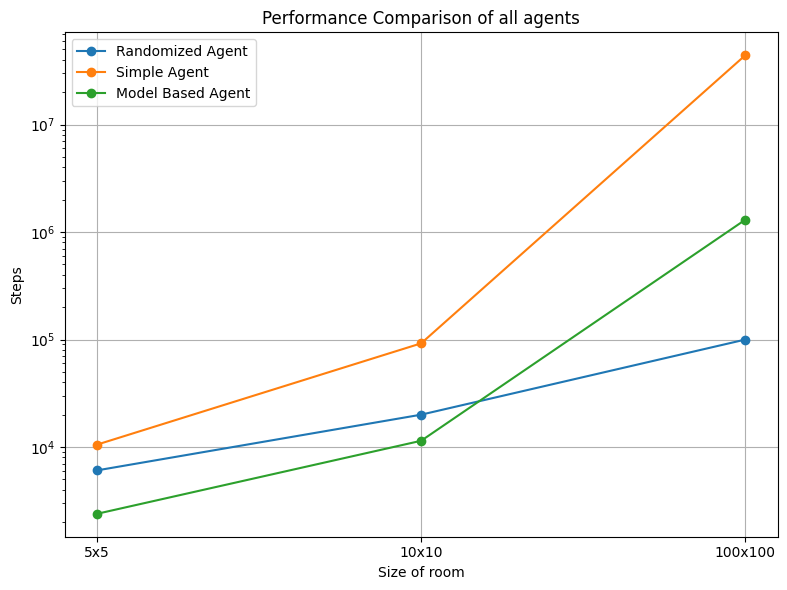

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 6))


plt.plot(df['size'], df['random'], marker='o', label='Randomized Agent')

plt.plot(df['size'], df['simple'], marker='o', label='Simple Agent')

plt.plot(df['size'], df['model'], marker='o', label='Model Based Agent')

plt.title('Performance Comparison of all agents')
plt.xlabel('Size of room')
plt.ylabel('Steps')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Using logarithmic scale for better visualization of large values
plt.tight_layout()

# Show plot
plt.show()


In the simulation, We can see model based agent is performing better than the simple reflex agent. However, Simple randomized agent is showing less steps because i put the max_step condition in the randomized function, I gave the max steps as 10 * (size*size), so my random agent is going maximum until that step and that it died or stop after reaching max_steps.

In the simple reflex and model based agents, I did not use max step condition so it is running until it cleans whole room. That is why my steps in model based agent is always less than the simple reflex agent because it is not randomly moving to any location just like simple reflex.



1. In the case of Rectangular Room with unknown size:

Simple Randomized Agent moves randomly and doesn't know the surroundings. It will keep moving randomly in an unknown-sized rectangular room till it might clean the entire room because it's random agent, it can take more time to finish the cleaning if the room is big.

Simple Reflex Agent makes judgments and steps based on its perception of dirt and bumps. Based on the sensor inputs, it might still be able to navigate successfully even without knowledge of the room's dimensions. however, it might have trouble if the space is a strange shape or has obstacles.

Model Based Agent keeps an internal storge of its surroundings as it has state/ memory and bases choices on it. It can utilize its model to travel and clean a room successfully, even if its size is unknown. However, its model might not correctly depict the environment if the room has obstructions, result in less than ideal performance.

2. if the cleaning area can have an irregular shape:

Simple Randomized Agent random movements might finally cover the full room but it might take a while and might not be able to go through irregular shapes efficiently.

Simple reflex agent can respond to inputs from its senses to navigate the environment and to easily adjust to a variety of irregular shapes.

Model based agent can take a long time or may be can go in infinite loop because first it will search of left corner and then traverse in a snake like movement but if there is a hallway then it might fail in that case.else

3. If the room contains obstacles:

Simple randomized agent will just randomly move in the room and if it encounters with the obstacles or the bumper is on then it will take any random direction or it can be a situation when the battery will die.

Simple reflex agent will learn from the percepts and also can react to obstacles and can move around it to clean the room.

Model based agent will store the value wherrever the agent found the obstacle and try not to go in that direction or revisit that block. Also, it will clean the room more efficiently compared to the other agents but the performance is going to be not so good.

## Advanced task: Obstacles

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can.

To introduce the obtacle in my room, i will use random function to introduce obstacles in the environment and use obs_prob argument in the function init_environment_obstacles. I used simple reflex agent in this scenario because the model based agent also follows the same idea. Lets suppose if we use model based agent, then it will traverse the environment in the snake wise order and whenit will encounter with the obstacle then the one option might be it will choose the action randomly to move which is same in the simple reflex agent as simple reflex also take the direction randomly.So, when any obstacle come, it will randomly choose one direction and move.

In [ ]:

import random

def init_environment_obstacles(size, p, obs_prob):
    env_obs = []
    for i in range(size):
        row = []
        for j in range(size):
            if random.random() < obs_prob:
                row.append('obstacles')
            else:
                if random.random() < p:
                    row.append('dirty')
                else:
                    row.append('clean')
        env_obs.append(row)
    return env_obs


def simulate_environment_obs(ag_function, size, p, max_steps, obs_prob):
    agt_pos = (random.randint(0, size - 1), random.randint(0, size - 1))  # Random starting position
    total_actions = 0  # Initialize total actions

    env_obs = init_environment_obstacles(size, p, obs_prob)

    while any('dirty' in row for row in env_obs):
        dirty = env_obs[agt_pos[0]][agt_pos[1]] == 'dirty'
        bumper = {
            "north": agt_pos[0] == 0 or env_obs[agt_pos[0] - 1][agt_pos[1]] == 'obstacles',
            "south": agt_pos[0] == size - 1 or env_obs[agt_pos[0] + 1][agt_pos[1]] == 'obstacles',
            "west": agt_pos[1] == 0 or env_obs[agt_pos[0]][agt_pos[1] - 1] == 'obstacles',
            "east": agt_pos[1] == size - 1 or env_obs[agt_pos[0]][agt_pos[1] + 1] == 'obstacles'
        }

        action, agt_pos = ag_function(bumper, dirty, agt_pos)
        total_actions += 1

    return total_actions

size = 100
p = 0.2
obs_prob = 0.3
max_step = 2 * size


env_obs = init_environment_obstacles(size, p, obs_prob)

total_actions = simulate_environment_obs(simple_reflex_agent, size, p, max_step, obs_prob)


In [ ]:
# Your ideas/code